<a href="https://colab.research.google.com/github/JLaura011/Business-Analytics/blob/master/Sesi%C3%B3n_8_Bonus_Track.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sesión 8: Bonus Track Preprocesamiento de data**



<img src="https://www.grupolambda.com.pe/wp-content/uploads/2020/03/home-logo.png" alt="drawing" width="300"/>
<br>

 ##### Docente: Jorge Brian Alarcon Flores 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. Introducción al preprocesamiento
* Los algoritmos de aprendizaje tienen afinidad hacia ciertos patrones de datos.
* Los datos no escalados o no estandarizados pueden tener predicciones inaceptables
* Los algoritmos de aprendizaje solo entienden el número, se requiere convertir la imagen de texto en número
* El preprocesamiento se refiere a la transformación antes de alimentar el aprendizaje automático


## 2. StandardScaler
* StandardScaler asume que sus datos se distribuyen normalmente dentro de cada característica y los escalará de tal manera que la distribución ahora esté centrada alrededor de 0, con una desviación estándar de 1.
* Calcular - Restar media de columna y div por desviación estándar



<img src = "https://github.com/awantik/machine-learning-slides/blob/master/pp4.PNG?raw=true">


* Si los datos no se distribuyen normalmente, este no es el mejor escalador para usar.

In [ ]:
#Generating normally distributed data

df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

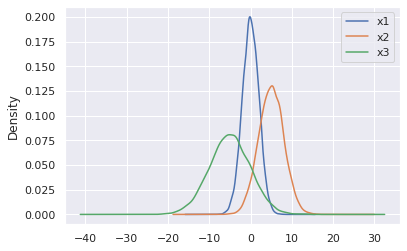

In [ ]:
# plotting data

df.plot.kde()

In [ ]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()

In [ ]:
data_tf = standardscaler.fit_transform(df)

In [ ]:
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])

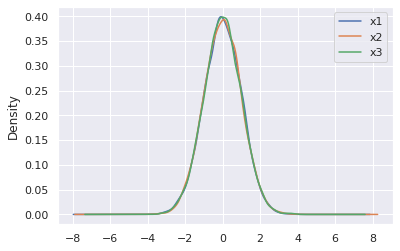

In [ ]:
df.plot.kde()


## 3. MinMaxScaler
* Uno de los más populares
* Calcular - Restar min de columna y div por diferencia entre max y min




<img src = "https://github.com/awantik/machine-learning-slides/blob/master/pp3.PNG?raw=true">



* Los datos cambian entre 0 y 1
* Si la distribución no es adecuada para StandardScaler, este escalador funciona.
* Sensible a los valores atípicos

In [ ]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

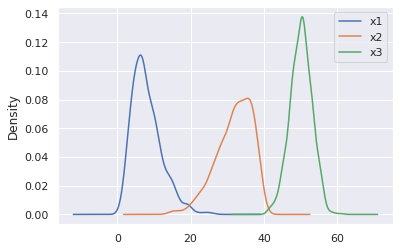

In [ ]:
df.plot.kde()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
minmax = MinMaxScaler()
data_tf = minmax.fit_transform(df)

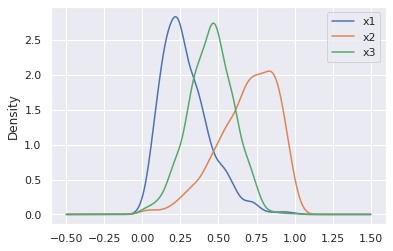

In [ ]:
df = pd.DataFrame(data_tf,columns=['x1','x2','x3'])
df.plot.kde()

## 4. Escalador robusto
* Adecuado para datos con valores atípicos
* Calcular restando 1er cuartil y div por diferencia entre 3er cuartil y 1er cuartil






<img src = "https://github.com/awantik/machine-learning-slides/blob/master/pp2.PNG?raw=true">

In [ ]:
df = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

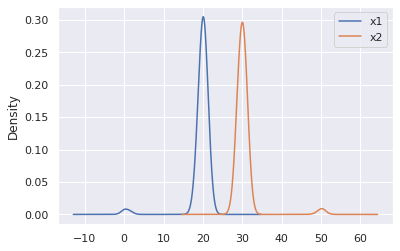

In [ ]:
df.plot.kde()

In [ ]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()

In [ ]:
data_tf = robustscaler.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2'])

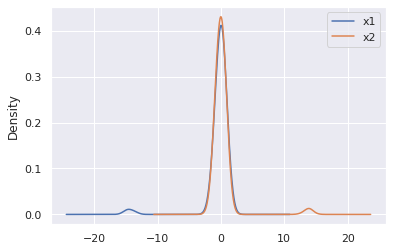

In [ ]:
df.plot.kde()

## 5. Normalizador
* Cada valor de parámetro se obtiene dividiendo por magnitud


<img src = "https://github.com/awantik/machine-learning-slides/blob/master/pp1.PNG?raw=true">
* Centraliza datos a origen

In [ ]:
df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

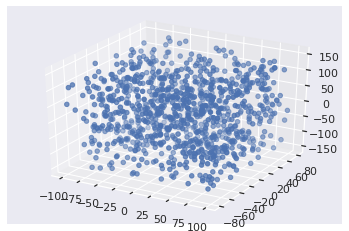

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
normalizer = Normalizer()
data_tf = normalizer.fit_transform(df)

In [ ]:
df = pd.DataFrame(data_tf, columns=['x1','y1','z1'])

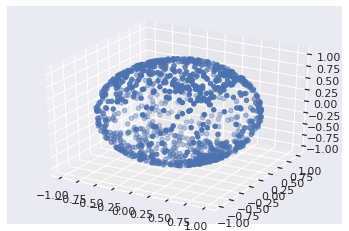

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

## 6. Binarización
* Umbralización de valores numéricos a valores binarios (0 o 1)
* Algunos algoritmos de aprendizaje suponen que los datos están en la distribución de Bernoulli

In [ ]:
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])

In [ ]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer()

In [ ]:
data_tf = binarizer.fit_transform(X)

In [ ]:
data_tf

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

## 7. Codificación de valores categóricos
#### Codificación de valores ordinales
* Valores ordinales: bajo, medio y alto. Relación entre valores
* LabelEncoding con el mapeo correcto

In [ ]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High']})

In [ ]:
df

,Age,Income
0,33,Low
1,44,Low
2,22,High
3,44,Medium
4,55,Medium
5,22,High


In [ ]:
df.Income.map({'Low':1,'Medium':2,'High':3})

0    1
1    1
2    3
3    2
4    2
5    3
Name: Income, dtype: int64

#### PD: También podemos usar la clase de transformador para esto, lo veremos más adelante

#### Codificación de valores nominales
* Valores nominales: masculino, femenino. No hay relación entre los datos.
* Una codificación activa para convertir datos en un vector dinámico

In [ ]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Gender':['Male','Female','Male','Female','Male','Male']})

In [ ]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [ ]:
le = LabelEncoder()
df['gender_tf'] = le.fit_transform(df.Gender)

In [ ]:
df

,Age,Gender,gender_tf
0,33,Male,1
1,44,Female,0
2,22,Male,1
3,44,Female,0
4,55,Male,1
5,22,Male,1


In [ ]:
OneHotEncoder().fit_transform(df[['gender_tf']]).toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])


## 8. Imputación
* Los valores perdidos no pueden procesarse mediante algoritmos de aprendizaje
* Imputers se pueden utilizar para inferir el valor de los datos faltantes de los datos existentes

In [ ]:
df = pd.DataFrame({
    'A':[1,2,3,4,np.nan,7],
    'B':[3,4,1,np.nan,4,5]
})

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
imputer.fit_transform(df)

array([[1. , 3. ],
       [2. , 4. ],
       [3. , 1. ],
       [4. , 3.4],
       [3.4, 4. ],
       [7. , 5. ]])

## 9. Características polinomiales
* Derivando una característica no lineal al convertir los datos en un grado superior
* Utilizado con regresión lineal para aprender modelo de grado superior

In [ ]:
df = pd.DataFrame({'A':[1,2,3,4,5], 'B':[2,3,4,5,6]})
df

,A,B
0,1,2
1,2,3
2,3,4
3,4,5
4,5,6


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=2)

In [ ]:
pol.fit_transform(df)

array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  3.,  4.,  9., 12., 16.],
       [ 1.,  4.,  5., 16., 20., 25.],
       [ 1.,  5.,  6., 25., 30., 36.]])